In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id','ques_id','rating','timestamp']

In [3]:
df = pd.read_csv('uNew.data', sep='\t', names=column_names)

In [19]:
df

,user_id,ques_id,rating,timestamp,ques
0,1,1,1,881250949,Q1
1,2,1,4,884182806,Q1
2,3,1,2,879372434,Q1
3,4,1,3,879485318,Q1
4,5,1,4,886176814,Q1
5,6,1,1,879372434,Q1
6,1,2,2,891717742,Q2
7,2,2,2,881171488,Q2
8,3,2,5,879781125,Q2
9,4,2,5,879270459,Q2


In [5]:
ques_asked_user = pd.read_csv('ques_asked')
ques_asked_user.head()

,ques_id,ques
0,1,Q1
1,2,Q2
2,3,Q3
3,4,Q4
4,5,Q5


In [6]:
df = pd.merge(df,ques_asked_user,on='ques_id')
df.head()

,user_id,ques_id,rating,timestamp,ques
0,1,1,1,881250949,Q1
1,2,1,4,884182806,Q1
2,3,1,2,879372434,Q1
3,4,1,3,879485318,Q1
4,5,1,4,886176814,Q1


In [7]:
# df

DATA ANALYSIS HEREAFTER

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

 Rating Dataframe with Average rating and number of rating.

In [9]:
df.groupby('ques_id')['rating'].mean().sort_values(ascending=False).head()

ques_id
3    3.833333
2    3.666667
5    2.666667
1    2.500000
4    2.333333
Name: rating, dtype: float64

In [10]:
df.groupby('ques_id')['rating'].count().sort_values(ascending=False).head()

ques_id
5    6
4    6
3    6
2    6
1    6
Name: rating, dtype: int64

In [11]:
rating = pd.DataFrame(df.groupby('ques_id')['rating'].mean())
rating.head()

,rating
ques_id,
1,2.500000
2,3.666667
3,3.833333
4,2.333333
5,2.666667


In [12]:
rating['num of ratings'] = pd.DataFrame(df.groupby('ques_id')['rating'].count())
rating.head()

,rating,num of ratings
ques_id,,
1,2.500000,6
2,3.666667,6
3,3.833333,6
4,2.333333,6
5,2.666667,6


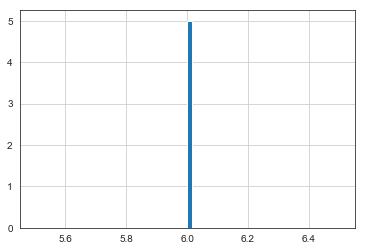

In [13]:
plt.figure()
rating['num of ratings'].hist(bins=70)

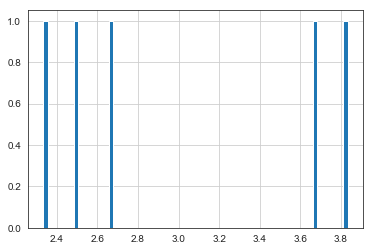

In [14]:
plt.figure()
rating['rating'].hist(bins=70)

C:\Users\Ameya Khot\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


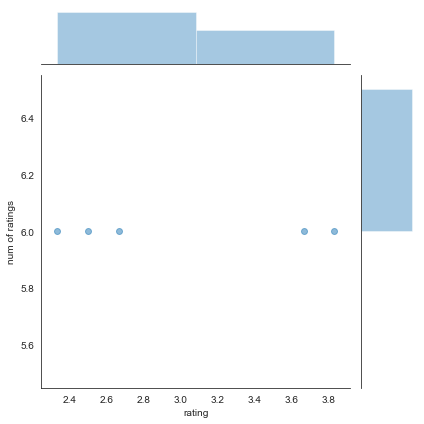

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=rating,alpha=0.5)

Recommending Similar Users

In [16]:
final_mat = df.pivot_table(index='user_id',columns='ques_id',values='rating')
final_mat

ques_id,1,2,3,4,5
user_id,,,,,
1,1,2,5,1,1
2,4,2,5,3,3
3,2,5,5,3,3
4,3,5,2,4,2
5,4,4,4,2,4
6,1,4,2,1,3


In [17]:
import math


def top_k(list_, k):
    return sorted(range(len(list_)), key=lambda t: list_[t])[:k]

def error_value(series_a, series_b):
    error = 0
    for each_rating_1, each_rating_2 in zip(series_a, series_b):
        # TODO: Check for NaN
        each_rating_1 = float(each_rating_1)
        each_rating_2 = float(each_rating_2)
        if math.isnan(each_rating_1) and math.isnan(each_rating_2):
            continue
        elif math.isnan(each_rating_1) or math.isnan(each_rating_2):
            error += 25
        else:
#             print(each_rating_1, each_rating_2)
            error += abs(each_rating_1*each_rating_1 - each_rating_2*each_rating_2)
#         print(error)
        
    return error**(0.5)

legend = 0
legend = final_mat.iloc[legend].as_matrix()
errors = []
for i in range(0, len(final_mat.iloc[:, 0])):
#     if i != legend:
    new_applicant = final_mat.iloc[i].as_matrix()
    errors.append(error_value(legend, new_applicant))

def pd_centered(df):
    return df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}])
    
closest_users = top_k(errors, 6)
result_list = [100 - x for x in errors]
similarity_percent = result_list.sort(reverse = True)

print('Errors list:', errors[:5])
#print('Closest users:', closest_users[1:])  #Key
#print('Similarity Percent:', result_list[1:])  #Values

user_recommendation = dict(zip(closest_users[1:],result_list[1:]))

#print(user_recommendation)

user_df = pd.DataFrame(user_recommendation,index=['%'])




Errors list: [0.0, 5.5677643628300215, 6.324555320336759, 8.246211251235321, 7.3484692283495345]


C:\Users\Ameya Khot\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Ameya Khot\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [18]:
print("Recommendation: ")
pd_centered(user_df)

Recommendation: 


,1,2,5,4,3
%,94.4322,93.6754,93.5969,92.6515,91.7538
